In [ ]:
!pip install kora
from kora import drive
drive.link_nbs()

In [ ]:
print('Setting UP')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

Setting UP


In [ ]:
from utility import *
from sudokuSolver import *

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
import operator
import numpy as np
from matplotlib import pyplot as plt
from keras.models import load_model



In [ ]:
def intializePredectionModel():
    model = load_model('/content/drive/MyDrive/Colab Notebooks/myModel.h5')
    return model

In [ ]:
pathImage = "/content/drive/MyDrive/Colab Notebooks/sudokoimg.png"
heightImg = 450
widthImg = 450
model = intializePredectionModel()

img = cv2.imread(pathImage) 
img = cv2.resize(img, (widthImg, heightImg)) 
imgBlank = np.zeros((heightImg, widthImg, 3), np.uint8)
imgThreshold = preProcess(img)
#cv2_imshow(imgBlank)


In [ ]:
imgContours = img.copy()
imgBigContour = img.copy() 
contours, hierarchy = cv2.findContours(imgThreshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
cv2.drawContours(imgContours, contours, -1, (0, 255, 0), 5) 

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

In [ ]:
biggest, maxArea =biggestContour(contours) 
print(biggest)
if biggest.size != 0:
    biggest = reorder(biggest)
    print(biggest)
    cv2.drawContours(imgBigContour, biggest, -1, (0, 0, 255), 25) # DRAW THE BIGGEST CONTOUR
    pts1 = np.float32(biggest) # PREPARE POINTS FOR WARP
    pts2 = np.float32([[0, 0],[widthImg, 0], [0, heightImg],[widthImg, heightImg]]) # PREPARE POINTS FOR WARP
    matrix = cv2.getPerspectiveTransform(pts1, pts2) # GER
    imgWarpColored = cv2.warpPerspective(img, matrix, (widthImg, heightImg))
    imgDetectedDigits = imgBlank.copy()
    imgWarpColored = cv2.cvtColor(imgWarpColored,cv2.COLOR_BGR2GRAY)

[[[  2   1]]

 [[  1 447]]

 [[447 448]]

 [[448   2]]]
[[[  2   1]]

 [[448   2]]

 [[  1 447]]

 [[447 448]]]


In [ ]:
imgSolvedDigits = imgBlank.copy()
boxes = splitBoxes(imgWarpColored)
print(len(boxes))
#cv2_imshow(boxes[1])
numbers = getPredection(boxes, model)
print(numbers)
imgDetectedDigits = displayNumbers(imgDetectedDigits, numbers, color=(255, 0, 255))
numbers = np.asarray(numbers)
posArray = np.where(numbers > 0, 0, 1)
print(posArray)

81
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[5, 3, 0, 0, 7, 0, 0, 0, 0, 6, 0, 0, 1, 9, 5, 0, 0, 0, 0, 9, 8, 0, 0, 0, 0, 6, 0, 8, 0, 0, 0, 6, 0, 0, 0, 3, 4, 0, 0, 8, 0, 3, 0, 0, 1, 7, 0, 0, 0, 2, 0, 0, 0, 6, 0, 6, 0, 0, 0, 0, 2, 8, 0, 0, 0, 0, 4, 1, 9, 0, 0, 5, 0, 0, 0, 0, 8, 0, 0, 7, 9]
[0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0
 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1
 1 1 0 1 1 0 0]


In [ ]:
board = np.array_split(numbers,9)
print(board)
try:
  solve(board)
except:
  pass
print(board)
flatList = []
for sublist in board:
  for item in sublist:
    flatList.append(item)
solvedNumbers =flatList*posArray
imgSolvedDigits= displayNumbers(imgSolvedDigits,solvedNumbers)


[array([5, 3, 0, 0, 7, 0, 0, 0, 0]), array([6, 0, 0, 1, 9, 5, 0, 0, 0]), array([0, 9, 8, 0, 0, 0, 0, 6, 0]), array([8, 0, 0, 0, 6, 0, 0, 0, 3]), array([4, 0, 0, 8, 0, 3, 0, 0, 1]), array([7, 0, 0, 0, 2, 0, 0, 0, 6]), array([0, 6, 0, 0, 0, 0, 2, 8, 0]), array([0, 0, 0, 4, 1, 9, 0, 0, 5]), array([0, 0, 0, 0, 8, 0, 0, 7, 9])]
[array([5, 3, 4, 6, 7, 8, 9, 1, 2]), array([6, 7, 2, 1, 9, 5, 3, 4, 8]), array([1, 9, 8, 3, 4, 2, 5, 6, 7]), array([8, 5, 9, 7, 6, 1, 4, 2, 3]), array([4, 2, 6, 8, 5, 3, 7, 9, 1]), array([7, 1, 3, 9, 2, 4, 8, 5, 6]), array([9, 6, 1, 5, 3, 7, 2, 8, 4]), array([2, 8, 7, 4, 1, 9, 6, 3, 5]), array([3, 4, 5, 2, 8, 6, 1, 7, 9])]


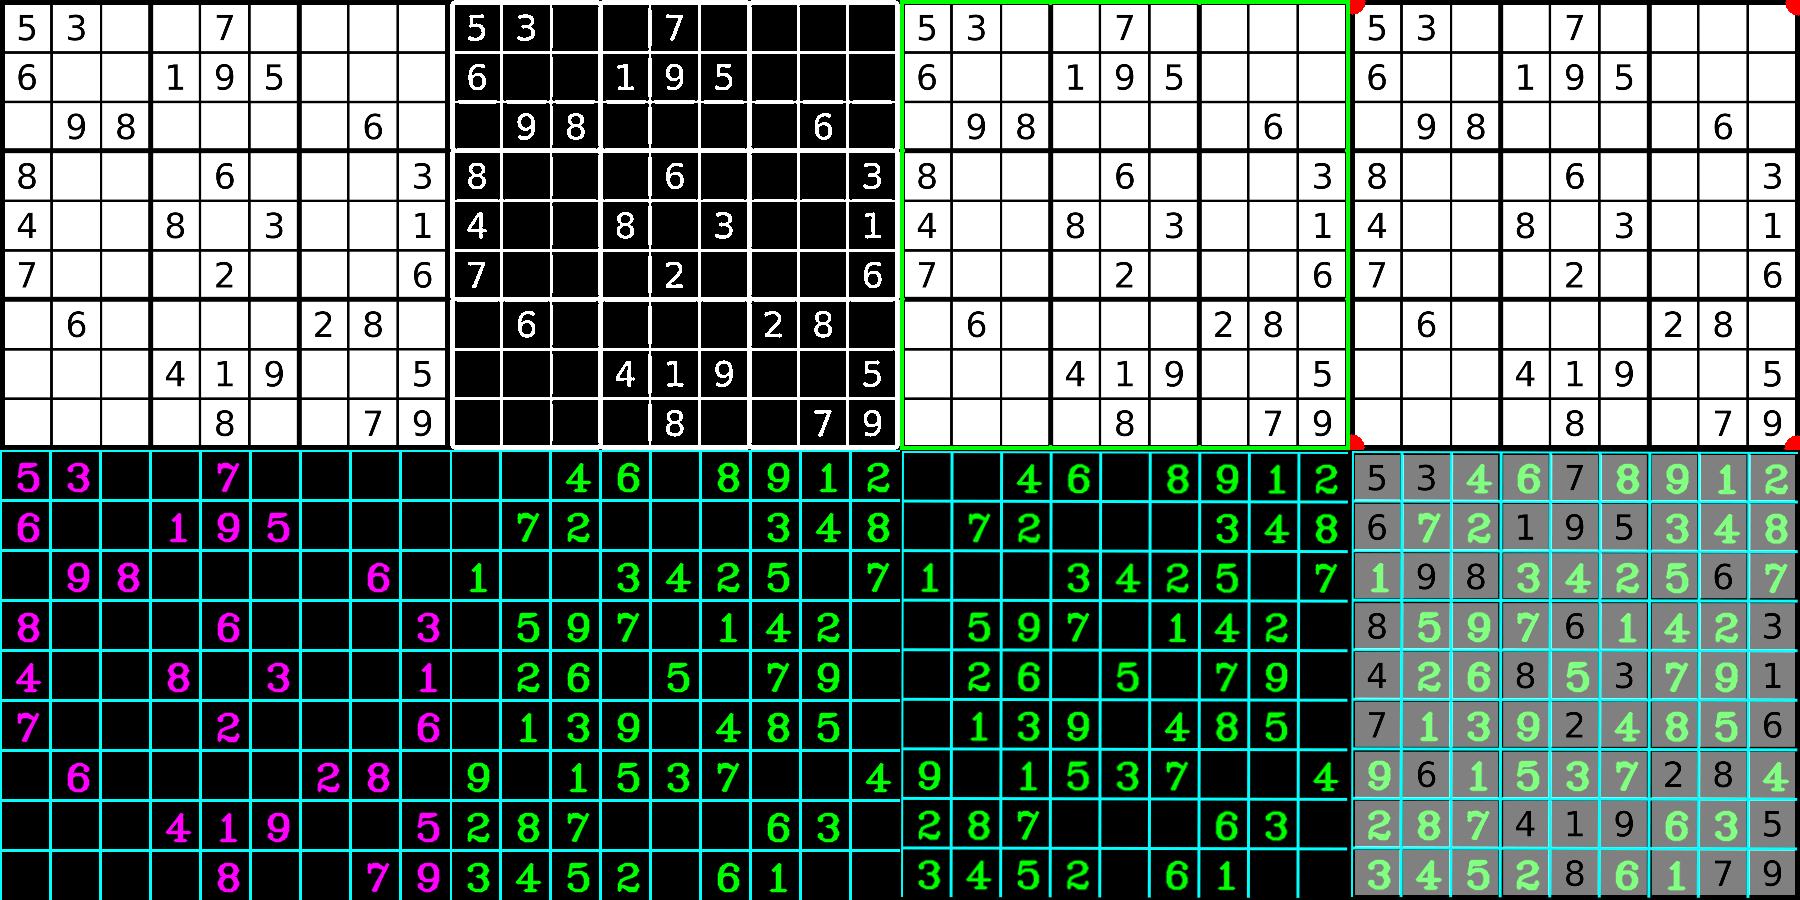

In [ ]:
  pts2 = np.float32(biggest) # PREPARE POINTS FOR WARP
  pts1 =  np.float32([[0, 0],[widthImg, 0], [0, heightImg],[widthImg, heightImg]]) # PREPARE POINTS FOR WARP
  matrix = cv2.getPerspectiveTransform(pts1, pts2)  # GER
  imgInvWarpColored = img.copy()
  imgInvWarpColored = cv2.warpPerspective(imgSolvedDigits, matrix, (widthImg, heightImg))
  inv_perspective = cv2.addWeighted(imgInvWarpColored, 1, img, 0.5, 1)
  imgDetectedDigits = drawGrid(imgDetectedDigits)
  imgSolvedDigits = drawGrid(imgSolvedDigits)
  

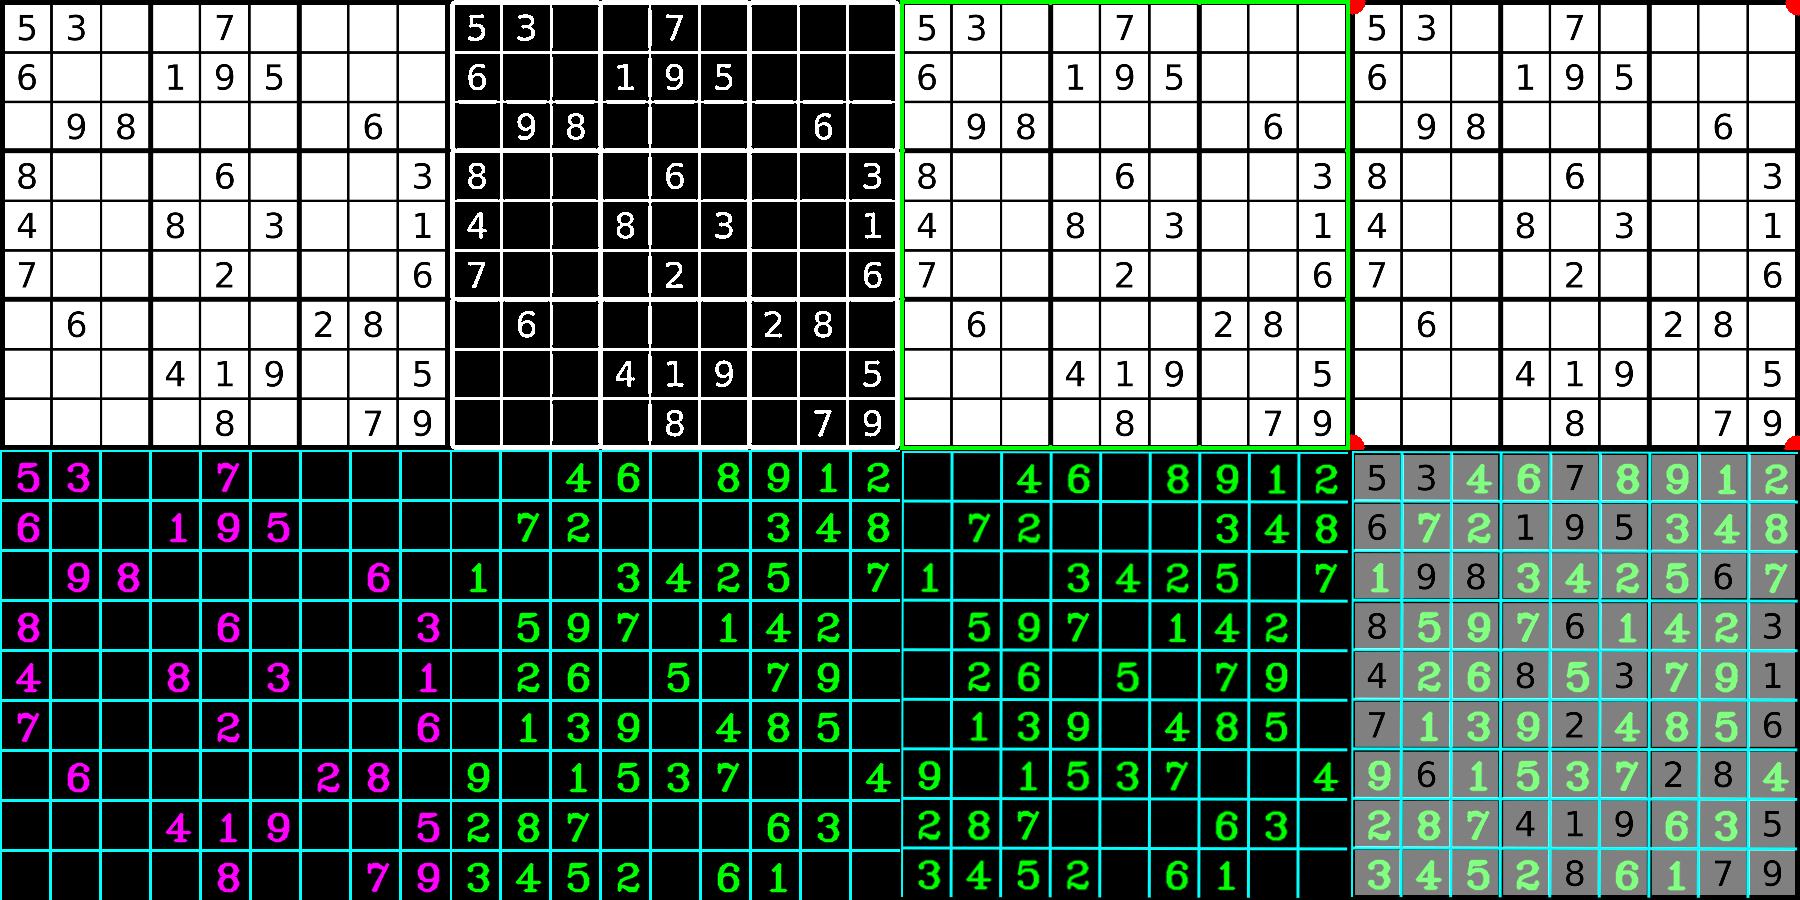

In [ ]:
imageArray = ([img,imgThreshold,imgContours, imgBigContour],
                  [imgDetectedDigits, imgSolvedDigits,imgInvWarpColored,inv_perspective])
stackedImage = stackImages(imageArray, 1)
cv2_imshow(stackedImage)